In [1]:
import pandas as pd 
from pandas import DataFrame,Series 
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Reading/Cleaning Data
Reading in data, converting date to datetime format, setting date as index

In [60]:
#reading in data
df = pd.read_csv("drdata.csv")
df.head()

#converting caldt to datetime format
def convert_date(value): 
    return pd.to_datetime(value, format='%Y%m%d', errors='ignore')

#convert to date time and set as index
dates = df['caldt'].map(convert_date)
df['caldt'] = dates
df = df.set_index('caldt')

Daily Returns for each ticker (12/31/08-12/31/18)

In [59]:
#daily returns for each ticker
pt = pd.pivot_table(df, values = 'dret', index = 'caldt', columns = 'ticker')
pt.head()

ticker,GLD,LQD,SPY,VT,WIP
caldt,,,,,
2008-12-31,-0.005474,0.006151,0.014173,0.012411,-0.008070
2009-01-02,0.010964,-0.007340,0.031989,0.026050,0.007379
2009-01-05,-0.024055,-0.004786,-0.004644,-0.005078,-0.014183
2009-01-06,-0.006165,0.001245,0.007803,0.010207,-0.005360
2009-01-07,0.000284,0.006224,-0.029420,-0.024368,0.011616


## Annualized Returns

In [61]:
#annualized return
dftr = pt.resample('Y').sum()+1
#multiply each 1+sum(return)
dftr = dftr.prod(axis = 0)
dfar = dftr**.1-1
dfar.to_frame(name = 'annualized returns')

,annualized returns
ticker,
GLD,0.034792
LQD,0.053826
SPY,0.133972
VT,0.100490
WIP,0.032577


## Annualized Standard Deviation

In [62]:
#annualized standard deviation
stddev = pt.std()*((252)**.5)
stddev.to_dict()
stddev.to_frame(name = 'annualized stddev')

,annualized stddev
ticker,
GLD,0.166085
LQD,0.051852
SPY,0.168829
VT,0.170698
WIP,0.086692


## Sharpe Ratio

In [64]:
#sharpe ratio
df['stddev'] = df['ticker'].map(stddev)
df['sharpe_ratio'] = df['dret']/df['stddev']
#pivot table of all sharpe ratio values for each ticker, indexed by date
ptsr = pd.pivot_table(df, values = 'sharpe_ratio', index = 'caldt', columns = 'ticker')
ptsr

ticker,GLD,LQD,SPY,VT,WIP
caldt,,,,,
2008-12-31,-0.032959,0.118626,0.083949,0.072707,-0.093088
2009-01-02,0.066015,-0.141556,0.189476,0.152609,0.085117
2009-01-05,-0.144836,-0.092301,-0.027507,-0.029748,-0.163602
2009-01-06,-0.037120,0.024011,0.046218,0.059796,-0.061828
2009-01-07,0.001710,0.120034,-0.174259,-0.142755,0.133991
2009-01-08,0.051408,0.068850,0.020346,0.032121,0.111636
2009-01-09,-0.059879,0.034637,-0.126039,-0.136651,0.011339
2009-01-12,-0.144113,0.069698,-0.133484,-0.143552,-0.128523
2009-01-13,-0.003709,-0.017569,0.010786,-0.046568,-0.175033


## Max Drawdown
Max Drawdown Calculations. A table displaying max drawdown for each ticker is further down.

In [54]:
#max drawdown over the period of 10 years
window = 252
maskgld = df['ticker'] == 'GLD'
dfgld = df[maskgld]
dfgld = dfgld.sort_index(ascending = True)
#the largest value. changes when a new larger value comes along
roll_max = dfgld['dret'].rolling(window, min_periods=1).max()
#calculate daily drawdown
daily_drawdown = dfgld['dret']/roll_max - 1.0

#max drawdown; changes whenever a new larger gap comes along.
max_drawdown = daily_drawdown.rolling(window, min_periods=1).min()
dfgld['daily_drawdown'] = daily_drawdown
dfgld['max_drawdown'] = max_drawdown
dfgld['roll_max'] = roll_max
#dfgld.head()

In [55]:
#max drawdown over the period of 10 years
window = 252
masklqd = df['ticker'] == 'LQD'
dflqd = df[masklqd]
dflqd = dflqd.sort_index(ascending = True)
#the largest value. changes when a new larger value comes along
roll_max = dflqd['dret'].rolling(window, min_periods=1).max()
#calculate daily drawdown
daily_drawdown = dflqd['dret']/roll_max - 1.0

#max drawdown; changes whenever a new larger gap comes along.
max_drawdown = daily_drawdown.rolling(window, min_periods=1).min()
dflqd['daily_drawdown'] = daily_drawdown
dflqd['max_drawdown'] = max_drawdown
dflqd['roll_max'] = roll_max
#dflqd.head()

In [56]:
#max drawdown over the period of 10 years
window = 252
maskspy = df['ticker'] == 'SPY'
dfspy = df[maskspy]
dfspy = dfspy.sort_index(ascending = True)
#the largest value. changes when a new larger value comes along
roll_max = dfspy['dret'].rolling(window, min_periods=1).max()
#calculate daily drawdown
daily_drawdown = dfspy['dret']/roll_max - 1.0

#max drawdown; changes whenever a new larger gap comes along.
max_drawdown = daily_drawdown.rolling(window, min_periods=1).min()
dfspy['daily_drawdown'] = daily_drawdown
dfspy['max_drawdown'] = max_drawdown
dfspy['roll_max'] = roll_max
#dfspy.head()

In [57]:
#max drawdown over the period of 10 years
window = 252
maskvt = df['ticker'] == 'VT'
dfvt = df[maskvt]
dfvt = dfvt.sort_index(ascending = True)
#the largest value. changes when a new larger value comes along
roll_max = dfvt['dret'].rolling(window, min_periods=1).max()
#calculate daily drawdown
daily_drawdown = dfvt['dret']/roll_max - 1.0

#max drawdown; changes whenever a new larger gap comes along.
max_drawdown = daily_drawdown.rolling(window, min_periods=1).min()
dfvt['daily_drawdown'] = daily_drawdown
dfvt['max_drawdown'] = max_drawdown
dfvt['roll_max'] = roll_max
#dfvt.head()

In [58]:
#max drawdown over the period of 10 years
window = 252
maskwip = df['ticker'] == 'WIP'
dfwip = df[maskwip]
dfwip = dfwip.sort_index(ascending = True)
#the largest value. changes when a new larger value comes along
roll_max = dfwip['dret'].rolling(window, min_periods=1).max()
#calculate daily drawdown
daily_drawdown = dfwip['dret']/roll_max - 1.0

#max drawdown; changes whenever a new larger gap comes along.
max_drawdown = daily_drawdown.rolling(window, min_periods=1).min()
dfwip['daily_drawdown'] = daily_drawdown
dfwip['max_drawdown'] = max_drawdown
dfwip['roll_max'] = roll_max
#dfwip.head()

## Max Drawdown Table
Calculated Max Drawdown for GLD, LQD, SPY, VT, and WIP (calculations above).

In [16]:
#max drawdown for each ticker
mddf = DataFrame()
mddf['GLD'] = dfgld['max_drawdown']
mddf['LQD'] = dflqd['max_drawdown']
mddf['SPY'] = dfspy['max_drawdown']
mddf['VT'] = dfvt['max_drawdown']
mddf['WIP'] = dfwip['max_drawdown']
mddf

,GLD,LQD,SPY,VT,WIP
caldt,,,,,
2008-12-31,0.000000,0.000000,0.000000,0.000000,0.000000
2009-01-02,0.000000,-2.193302,0.000000,0.000000,0.000000
2009-01-05,-3.193999,-2.193302,-1.145175,-1.194933,-2.922076
2009-01-06,-3.193999,-2.193302,-1.145175,-1.194933,-2.922076
2009-01-07,-3.193999,-2.193302,-1.919691,-1.935432,-2.922076
2009-01-08,-3.193999,-2.193302,-1.919691,-1.935432,-2.922076
2009-01-09,-3.193999,-2.193302,-1.919691,-1.935432,-2.922076
2009-01-12,-3.193999,-2.193302,-1.919691,-1.940653,-2.922076
2009-01-13,-3.193999,-2.193302,-1.919691,-1.940653,-2.922076


## Max Drawdown Plots
For GLD, LQD, SPY, VT, and WIP

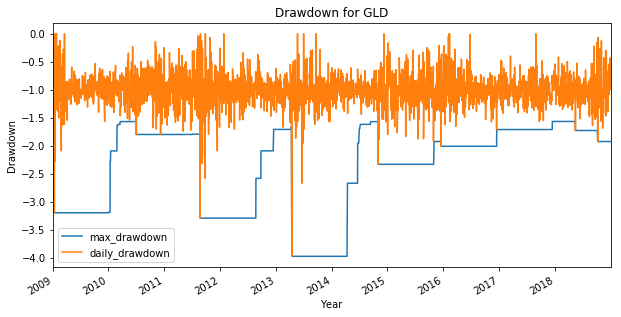

In [41]:
#plot of max drawdown for gold
dfgld['max_drawdown'].plot(figsize = (10,5))
dfgld['daily_drawdown'].plot(figsize = (10,5))
xlabel('Year')
ylabel('Drawdown')
title('Drawdown for GLD')
legend()

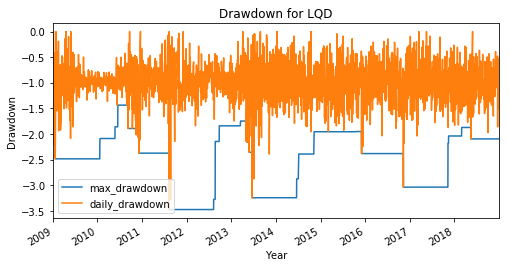

In [42]:
#plot of max drawdown for LQD
dflqd['max_drawdown'].plot(figsize = (8,4))
dflqd['daily_drawdown'].plot(figsize = (8,4))
xlabel('Year')
ylabel('Drawdown')
title('Drawdown for LQD')
legend()

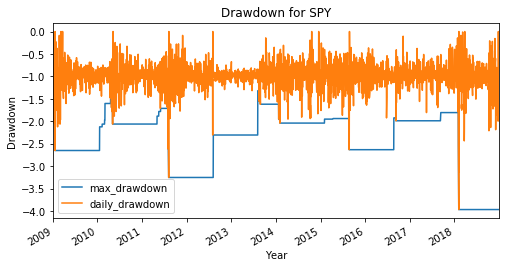

In [43]:
#plot of max drawdown for SPY 
dfspy['max_drawdown'].plot(figsize = (8,4))
dfspy['daily_drawdown'].plot(figsize = (8,4))
xlabel('Year')
ylabel('Drawdown')
title('Drawdown for SPY')
legend()

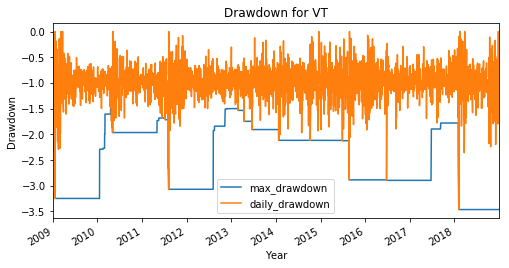

In [45]:
#plot of max drawdown for VT
dfvt['max_drawdown'].plot(figsize = (8,4))
dfvt['daily_drawdown'].plot(figsize = (8,4))
xlabel('Year')
ylabel('Drawdown')
title('Drawdown for VT')
legend()

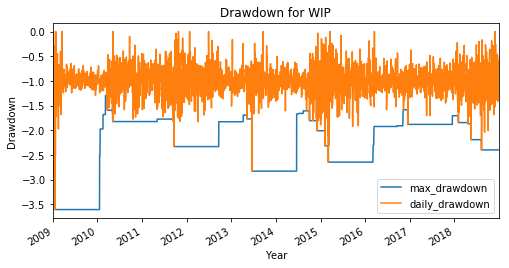

In [46]:
#plot of max drawdown for WIP
dfwip['max_drawdown'].plot(figsize = (8,4))
dfwip['daily_drawdown'].plot(figsize = (8,4))
xlabel('Year')
ylabel('Drawdown')
title('Drawdown for WIP')
legend()

## Cumulative Performance
Cumulative performance of each asset class over 10 years, each starting at $100.

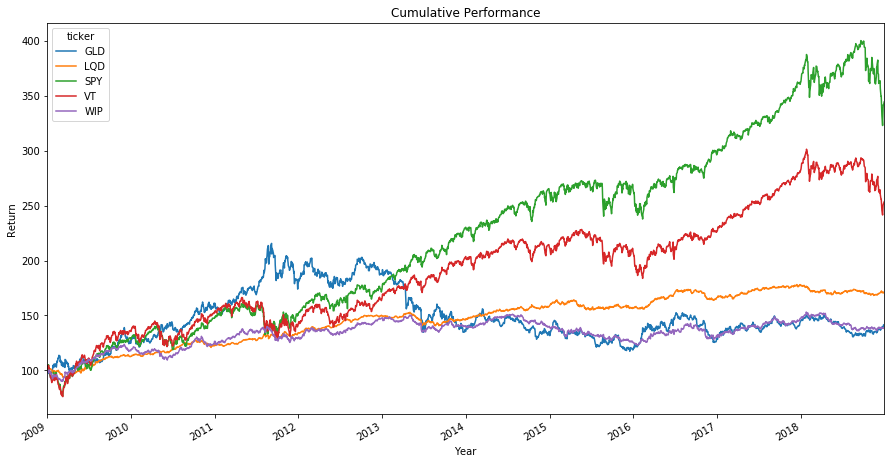

In [27]:
#(1 + daily return value)
pt1 = pt+1
#multiplying (1+daily return value) with each other
cperf = pt1.cumprod(axis = 0)
#multiplyig by 100 since we start with $100 invested into each asset class
cper = cperf*100
#plotted cumulative performance
cper.plot(figsize = (15,8))
xlabel('Year')
ylabel('Return')
title('Cumulative Performance')
show()